# 1. BUSINESS UNDERSTANDING

Proyek ini bertujuan untuk membangun model transfer learning yang dapat mengklasifikasikan 5 jenis penyakit kulit. Teknik yang digunakan adalah Transfer Learning, dengan menggunakan model pre-trained Xception. Model ini akan membantu dalam deteksi penyakit kulit dengan lebih akurat dan lebih cepat, sehingga dapat mendukung diagnosis medis. Metode yang digunakan pada proyek ini adalah Cross-Industry Standard Process for Data Mining (CRISP-DM).

# 2. DATA UNDERSTANDING

Tahap ini berfokus pada persiapan dan pemahaman data yang digunakan dalam model, serta proses eksplorasi dan visualisasi data untuk memahami distribusi gambar penyakit kulit.

## 2.1 IMPORT LIBRARY

In [28]:
# Mengimport Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimport Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Libraries untuk pembangunan model transfer learning dengan Xception
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import RandomBrightness, RandomFlip, RandomRotation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

## 2.2 LOAD DATASET

In [29]:
combined_dir = "/kaggle/input/capstone-dataset/fix-dataset"
categories = ['acne', 'hyperpigmentation', 'Nail_psoriasis', 'SJS-TEN', 'Vitiligo']

# Mengecek jumlah gambar di tiap folder kategori
for category in categories:
    category_dir = os.path.join(combined_dir, category)
    image_files = os.listdir(category_dir)
    print(f"Found {len(image_files)} images in {category} folder.")

Found 1043 images in acne folder.
Found 1028 images in hyperpigmentation folder.
Found 1100 images in Nail_psoriasis folder.
Found 1154 images in SJS-TEN folder.
Found 1100 images in Vitiligo folder.


## 2.3 DATA VISUALIZING

### 2.3.1 NAIL PSORIASIS

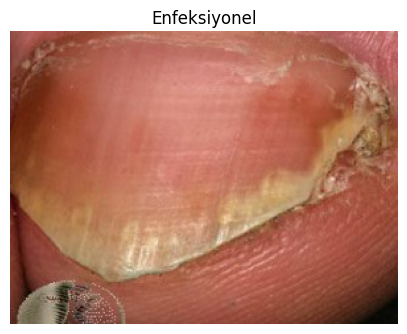

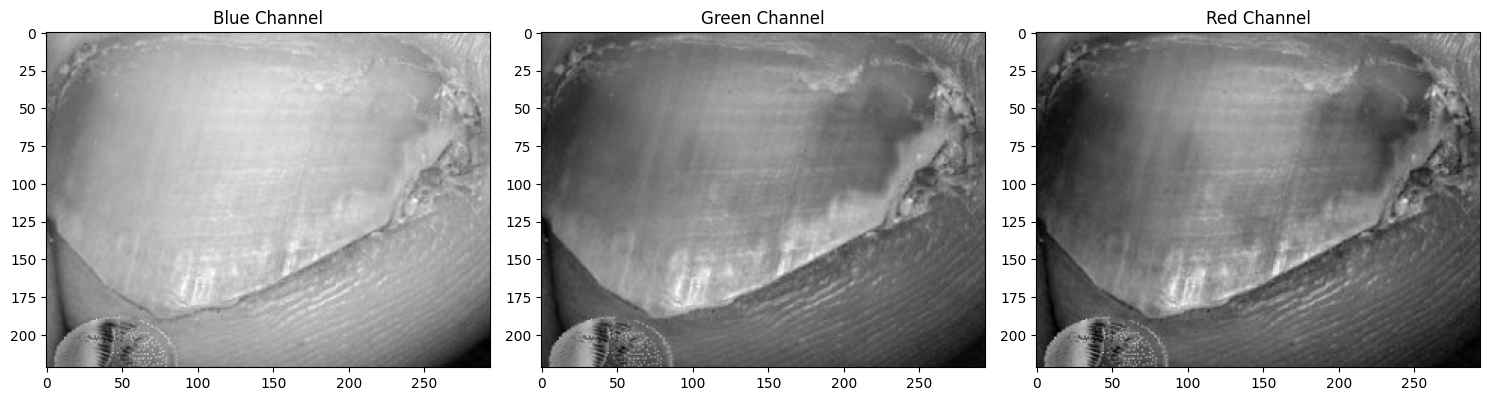

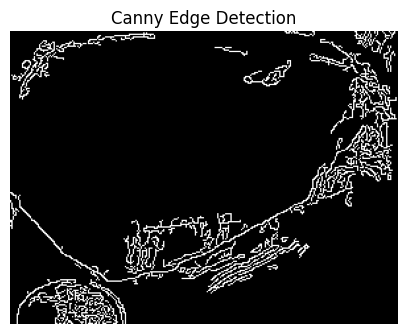

In [30]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/Nail_psoriasis/3228__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInkiLDM2XQ.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Enfeksiyonel')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

### 2.3.2 SJS TEN

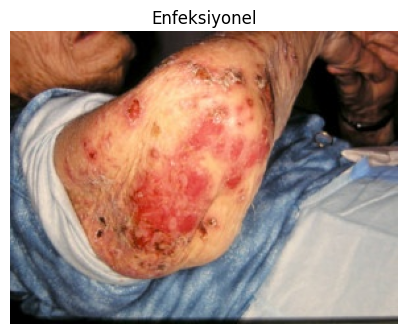

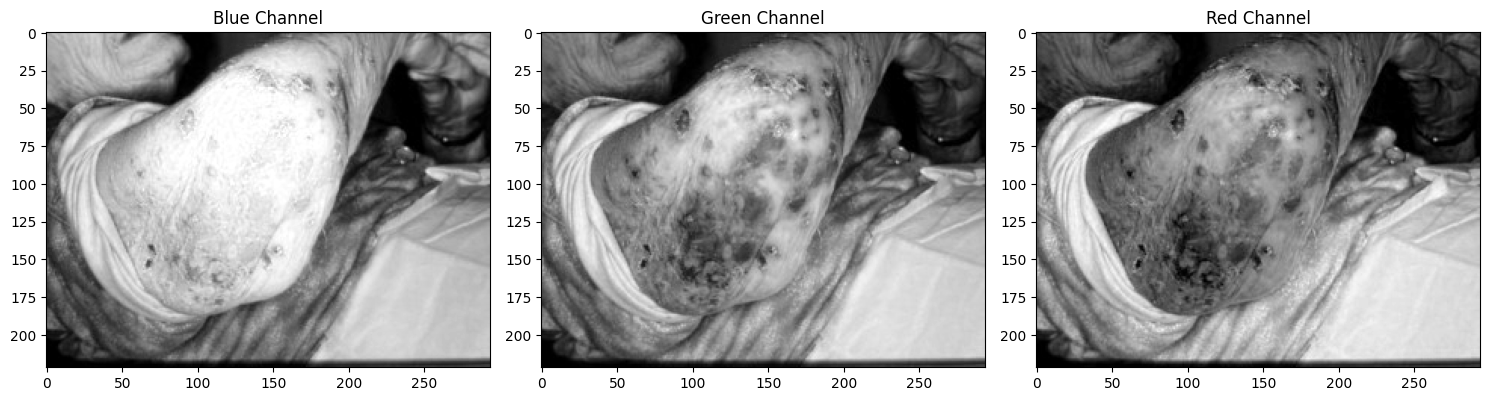

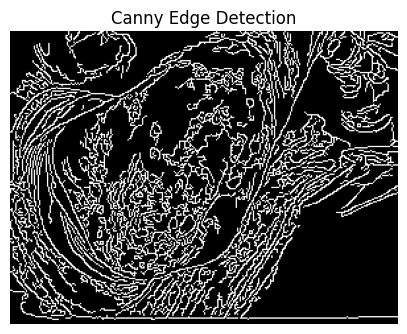

In [31]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/SJS-TEN/Crop-0350_0300sjs-ten-arm-90__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Enfeksiyonel')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

### 2.3.3 VITILIGO

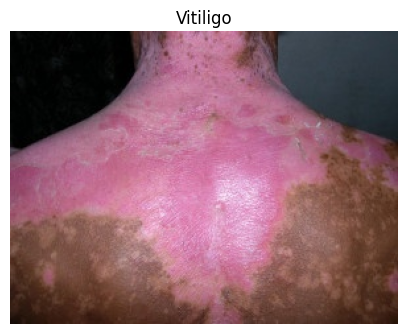

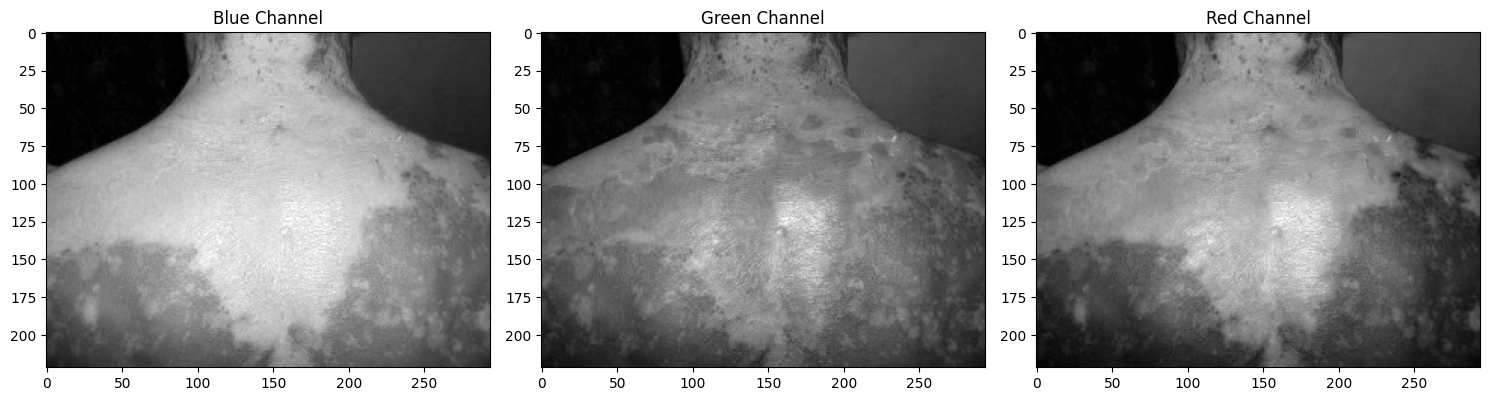

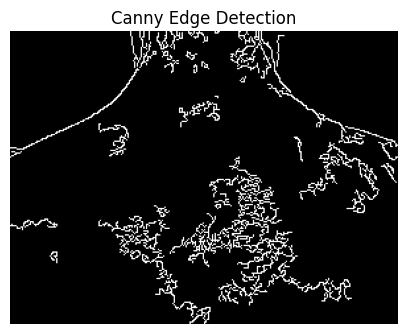

In [32]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/Vitiligo/Crop-0350_0300sunburn-vitiligo__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Vitiligo')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


### 2.3.4 ACNE

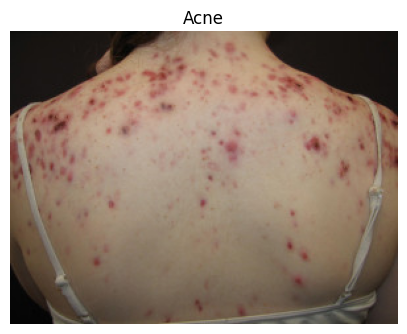

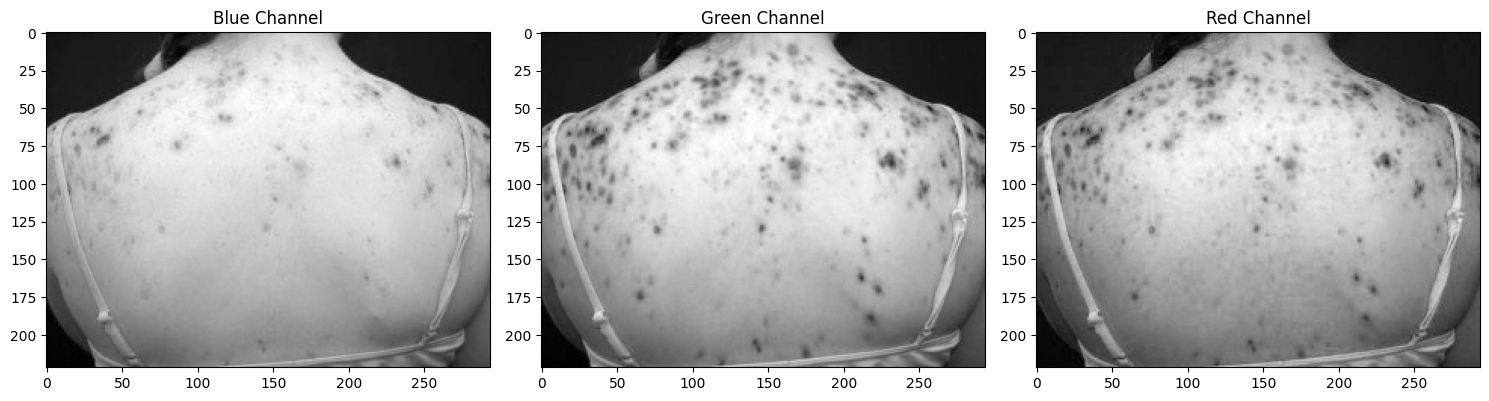

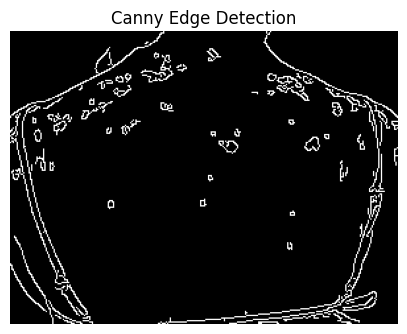

In [33]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/acne/146__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDEwXQ.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Acne')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


### 2.3.5 HYPERPIGMENTATION

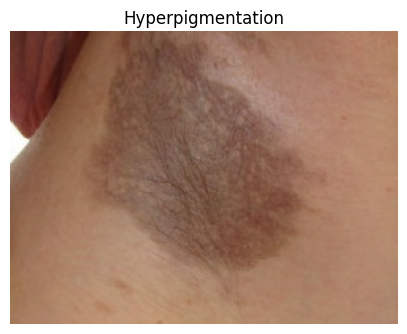

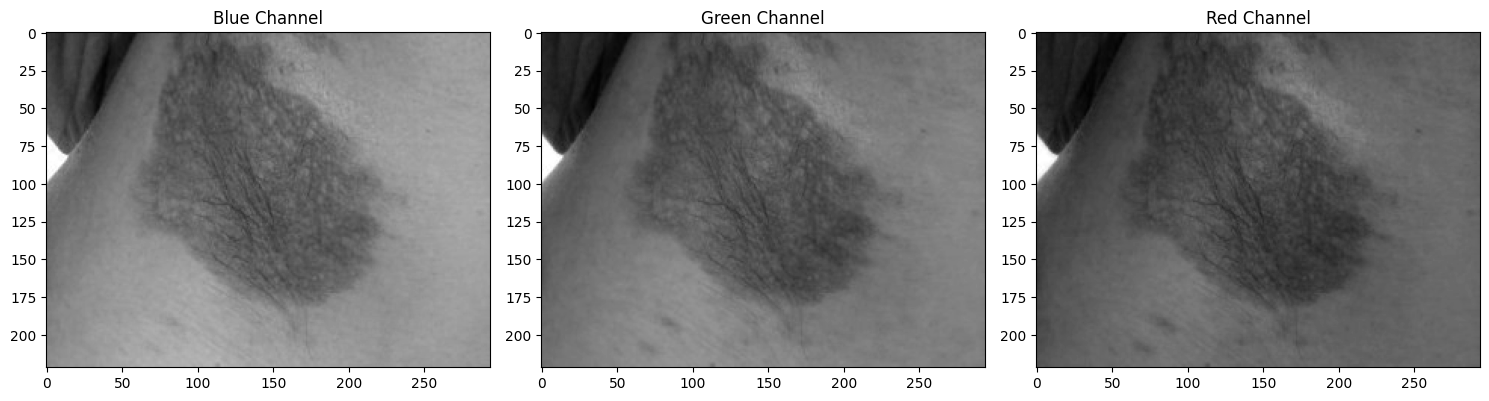

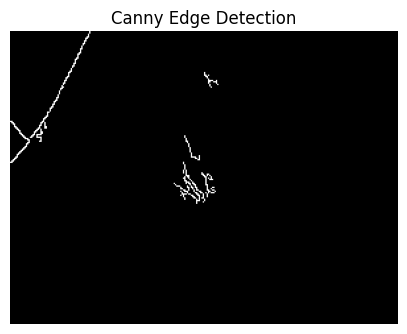

In [34]:
img = cv2.imread('/kaggle/input/capstone-dataset/fix-dataset/hyperpigmentation/Crop-0350_0300acquired-dermal-macular-hyperpigmentation-018__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsInkiLDg1XQ.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title('Hyperpigmentation')
plt.axis("off")
plt.show()

b, g, r = cv2.split(img)
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")

plt.tight_layout()
plt.show()

canny = cv2.Canny(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 50, 170)
plt.figure(figsize=(5,5))
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


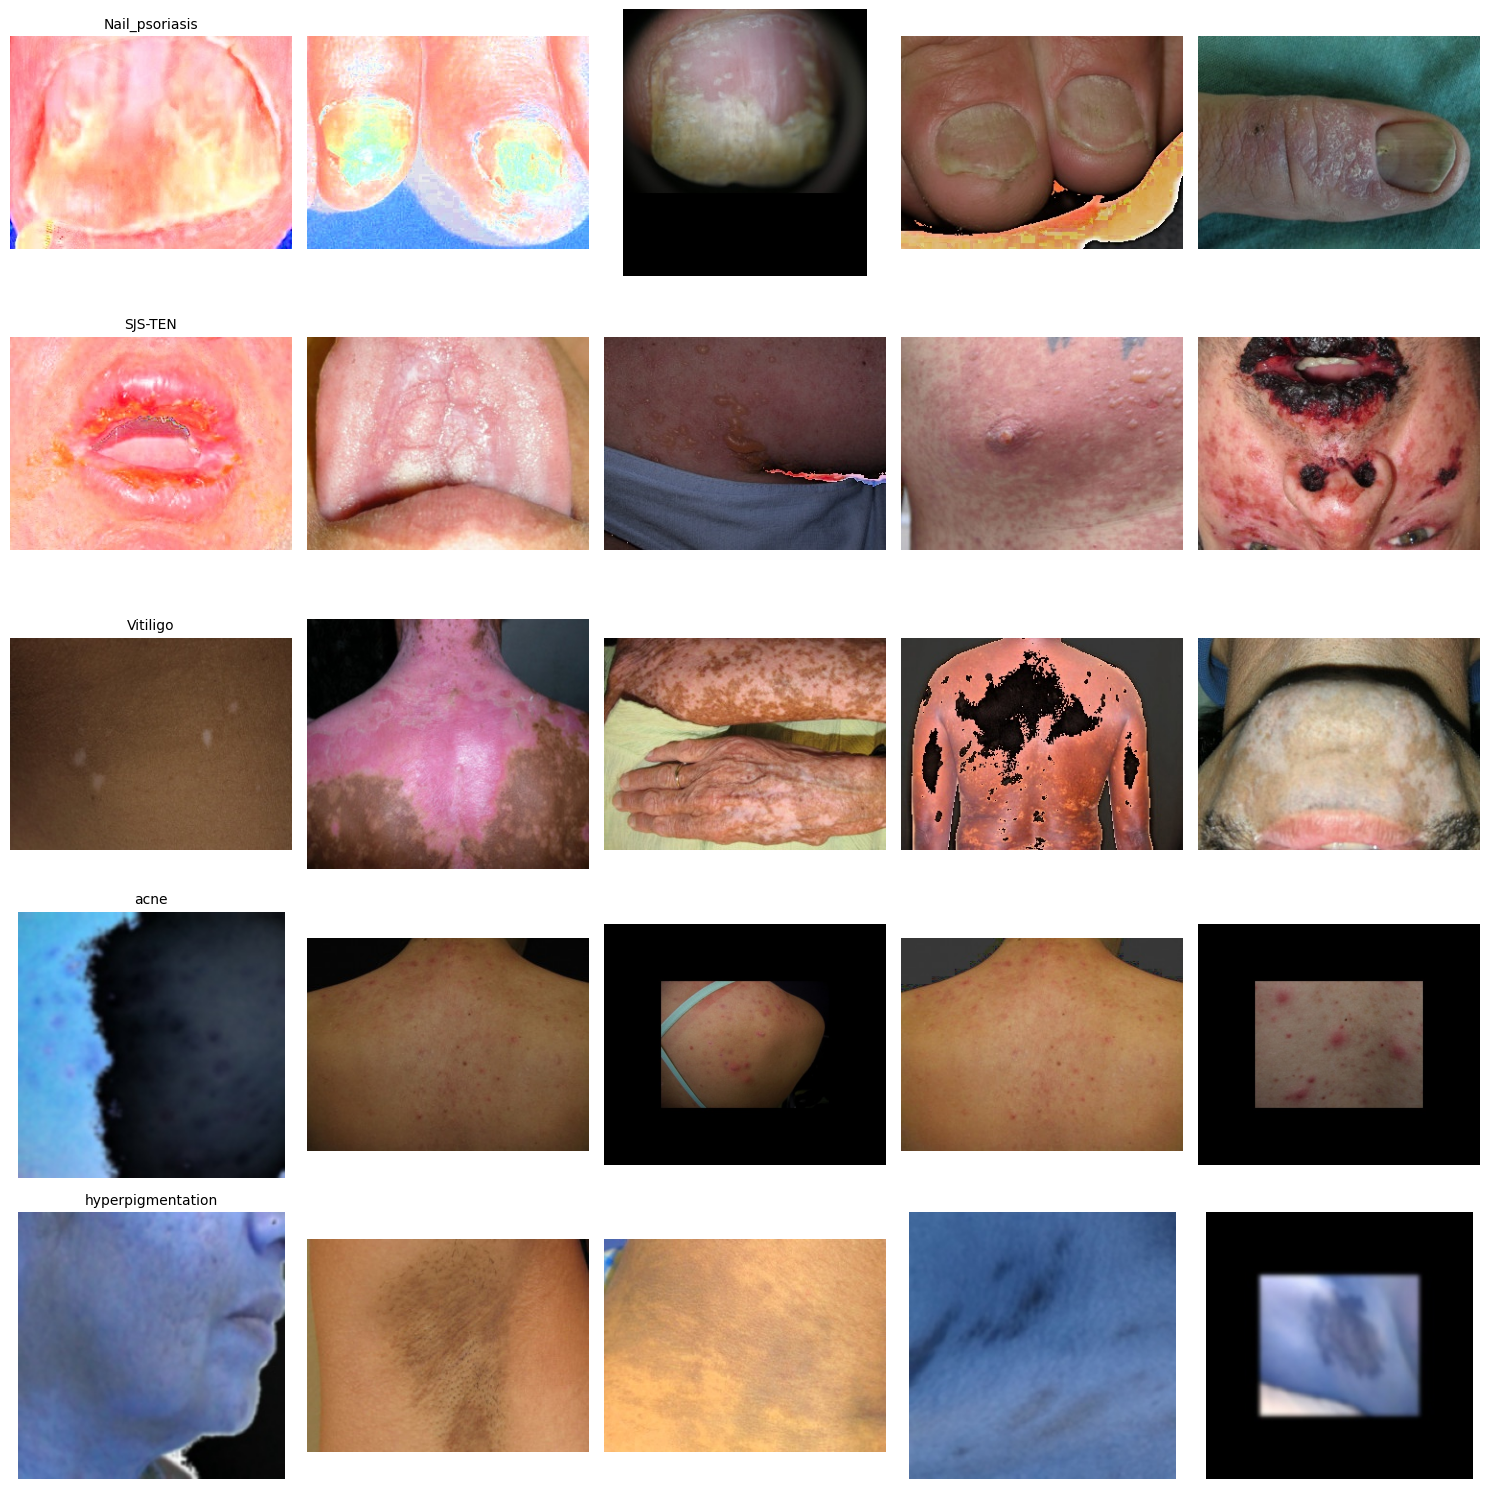

In [35]:
import matplotlib.image as mpimg

# Path ke direktori training
train_dir = '/kaggle/input/capstone-dataset/fix-dataset'

# Menampilkan 5 gambar dari setiap kelas
num_images = 5
classes = sorted(os.listdir(train_dir))  # urutkan agar rapi

plt.figure(figsize=(15, len(classes) * 3))

for i, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        # Ambil 5 gambar secara acak dari kelas ini
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        selected_images = random.sample(images, min(num_images, len(images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)
            img = mpimg.imread(img_path)

            ax = plt.subplot(len(classes), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                ax.set_title(class_name, fontsize=10)

plt.tight_layout()
plt.show()

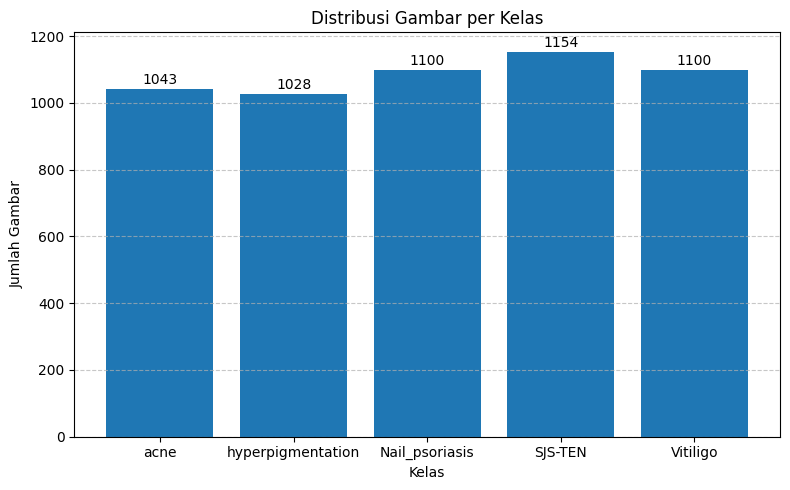

In [37]:
# Plotting distribusi gambar per kelas
image_counts = []
for category in categories:
    category_dir = os.path.join(combined_dir, category)
    image_files = os.listdir(category_dir)
    image_counts.append(len(image_files))

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, image_counts)
plt.title('Distribusi Gambar per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, str(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 3. DATA PREPARATION

Persiapan data dilakukan dengan membuat DataFrame yang berisi path gambar dan label, kemudian membagi data menjadi data latih dan data uji.

In [38]:
# Menyusun DataFrame yang berisi path dan label
mypath = '/kaggle/input/capstone-dataset/fix-dataset'
file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path": full_path, 'file_name': file_name, 'labels': labels})

# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

labels
Nail_psoriasis       1100
SJS-TEN              1154
Vitiligo             1100
acne                 1043
hyperpigmentation    1028
dtype: int64

## 3.1 SPLITTING DATA

Data dibagi menjadi dua bagian: data latih (80%) dan data uji (20%) menggunakan train_test_split() dari sklearn.

In [39]:
# Variabel yang digunakan pada pemisahan data ini dimana variabel x = data path dan y = data labels
X = df['path']
y = df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)
df_tr = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_te = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

# Menyatukan kedalam masing-masing dataframe
df_all = pd.concat([df_tr, df_te], ignore_index=True)

# Print hasil diatas untuk melihat panjang size data training dan testing
print('train size', len(df_tr))
print('test size', len(df_te))

train size 4340
test size 1085


In [40]:
# Menggabungkan DataFrame df_tr dan df_te
dataset_path = "/kaggle/working/finalDataset/"

In [41]:
for index, row in tq(df_all.iterrows()):
    file_path = row['path']
    if not os.path.exists(file_path):
        file_path = os.path.join(mypath, row['labels'], row['file_name'])

    dest_dir = os.path.join(dataset_path, row['set'], row['labels'])
    os.makedirs(dest_dir, exist_ok=True)

    destination_file_name = os.path.basename(file_path)  
    file_dest = os.path.join(dest_dir, destination_file_name)

    if not os.path.exists(file_dest):
        try:
            shutil.copy2(file_path, file_dest)
        except FileNotFoundError:
            print(f"[File tidak ditemukan] → {file_path}")

0it [00:00, ?it/s]

## 3.2 AUGMENTATION


Pada tahap ini, saya menyarankan untuk tidak melakukan Augmentasi yang berlebihan dikarenakan gambar yang diubah ubah akan membuat pelatihan model pada akurasinya tidak baik dan tidak stabil.

In [42]:
TRAIN_DIR = "/kaggle/working/finalDataset/train"
TEST_DIR = "/kaggle/working/finalDataset/test"

datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(
    TRAIN_DIR, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')
test_generator = test_datagen.flow_from_directory(
    TEST_DIR, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

Found 3474 images belonging to 5 classes.
Found 866 images belonging to 5 classes.
Found 1085 images belonging to 5 classes.


In [43]:
print(train_generator.class_indices)

{'Nail_psoriasis': 0, 'SJS-TEN': 1, 'Vitiligo': 2, 'acne': 3, 'hyperpigmentation': 4}


# 4. MODELLING

Pada tahap ini, kita memuat model Xception yang sudah dilatih sebelumnya (pre-trained) dan menambahkan lapisan-lapisan tambahan untuk menyesuaikan model dengan tugas klasifikasi penyakit kulit.

## TRANSFER LEARNING

In [44]:
# Memuat base model Xception
base_model = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

Menambahkan lapisan-lapisan seperti Conv2D, MaxPooling2D, Flatten, Dense, dan Dropout untuk model akhir.

In [45]:
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # Keluaran 5 kelas
])

In [46]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 64)            │       1,179,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,115,693 (84.36 MB)

 Trainable params: 1,254,213 (4.78 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [47]:
# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping custom callback
class EarlyStoppingCustomBothAcc(Callback):
    def __init__(self, target_accuracy=0.98):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc is not None and val_acc is not None:
            if train_acc >= self.target_accuracy and val_acc >= self.target_accuracy:
                print(f"\nEpoch {epoch+1}: Training & Validation Accuracy mencapai target {self.target_accuracy*100:.2f}%. Training model diberhentikan.")
                self.model.stop_training = True

earlystop_keras = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

reduce_learningRate = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

callbacks = [EarlyStoppingCustomBothAcc(target_accuracy=0.98), earlystop_keras, reduce_learningRate]

In [48]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 233ms/step - accuracy: 0.4406 - loss: 1.3745 - val_accuracy: 0.8684 - val_loss: 0.4340 - learning_rate: 1.0000e-04
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 167ms/step - accuracy: 0.8202 - loss: 0.5243 - val_accuracy: 0.9053 - val_loss: 0.2916 - learning_rate: 1.0000e-04
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - accuracy: 0.9015 - loss: 0.2959 - val_accuracy: 0.9238 - val_loss: 0.2287 - learning_rate: 1.0000e-04
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 166ms/step - accuracy: 0.9305 - loss: 0.2110 - val_accuracy: 0.9342 - val_loss: 0.2024 - learning_rate: 1.0000e-04
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.9514 - loss: 0.1467 - val_accuracy: 0.9527 - val_loss: 0.1492 - learning_rate: 1.0000e-04
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.9662 - loss: 0.1051 - val_accuracy: 0.9538 - val_loss: 0.1302 - learning_rate: 1.0000e-04
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 16

# 5. EVALUATION & VISUALITATION MATRIX

In [49]:
# Evaluasi pada data training
loss_train, accuracy_train = model.evaluate(train_generator, verbose=1)
print('=== Evaluasi Data Train ===')
print('Loss      :', loss_train)
print('Accuracy  :', accuracy_train)

# Evaluasi pada data validasi
loss_val, accuracy_val = model.evaluate(validation_generator, verbose=1)
print('\n=== Evaluasi Data Validasi ===')
print('Loss      :', loss_val)
print('Accuracy  :', accuracy_val)

# Evaluasi pada data testing
loss_test, accuracy_test = model.evaluate(test_generator, verbose=1)
print('\n=== Evaluasi Data Testing ===')
print('Loss      :', loss_test)
print('Accuracy  :', accuracy_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 16s 142ms/step - accuracy: 1.0000 - loss: 0.0022
=== Evaluasi Data Train ===
Loss      : 0.0019322034204378724
Accuracy  : 1.0
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9659 - loss: 0.1118

=== Evaluasi Data Validasi ===
Loss      : 0.10993439704179764
Accuracy  : 0.9653579592704773
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 333ms/step - accuracy: 0.9738 - loss: 0.0755

=== Evaluasi Data Testing ===
Loss      : 0.10009811818599701
Accuracy  : 0.9658986330032349


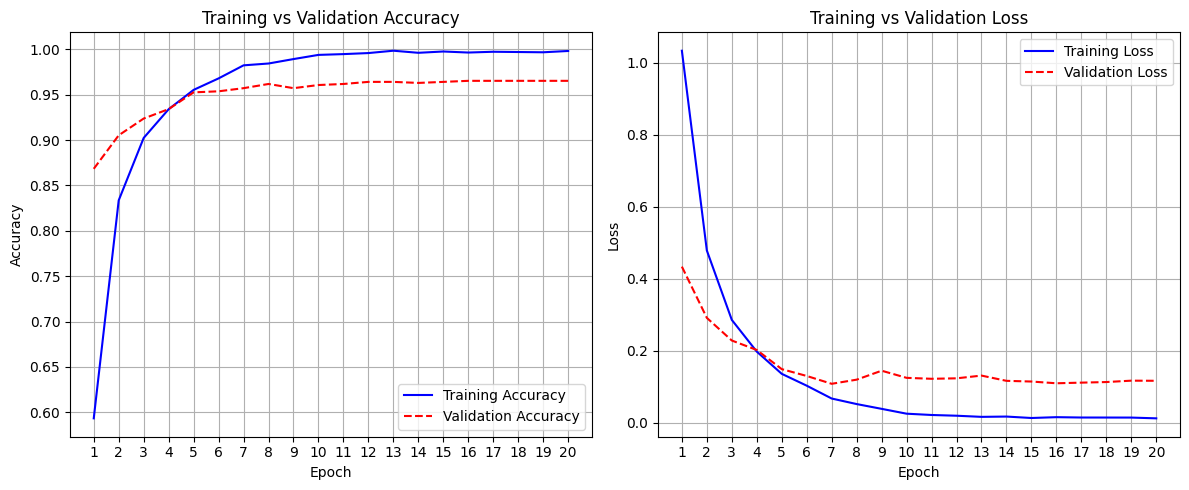

In [50]:
# Ambil data dari history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(acc) + 1))  # <- Ini membuat angka 1, 2, 3, dst

# Plot Akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # <-- Menampilkan angka bulat di sumbu X
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)  # <-- Menampilkan angka bulat di sumbu X
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step
=== Classification Report ===
                   precision    recall  f1-score   support

   Nail_psoriasis       1.00      0.99      0.99       220
          SJS-TEN       0.95      0.96      0.95       239
         Vitiligo       0.93      0.93      0.93       201
             acne       0.99      0.99      0.99       219
hyperpigmentation       0.97      0.96      0.96       206

         accuracy                           0.97      1085
        macro avg       0.97      0.97      0.97      1085
     weighted avg       0.97      0.97      0.97      1085



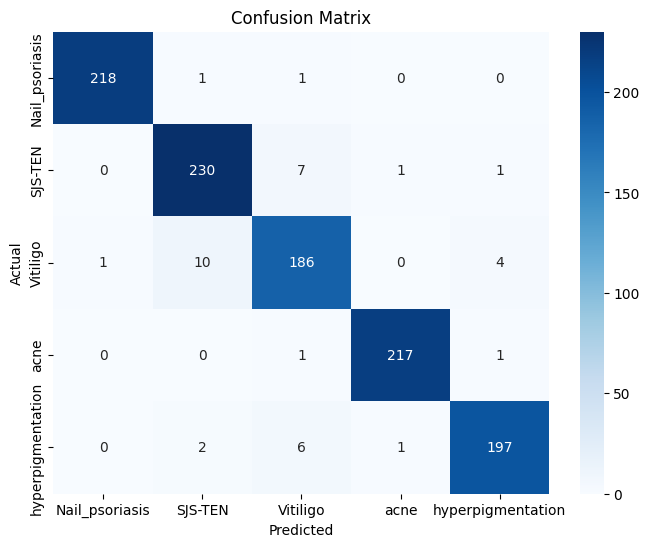

In [51]:
# Mendapatkan prediksi
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Mendapatkan label asli
y_true = test_generator.classes

# Nama kelas
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 6. PREDICT 

Melakukan prediksi pada data gambar test.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


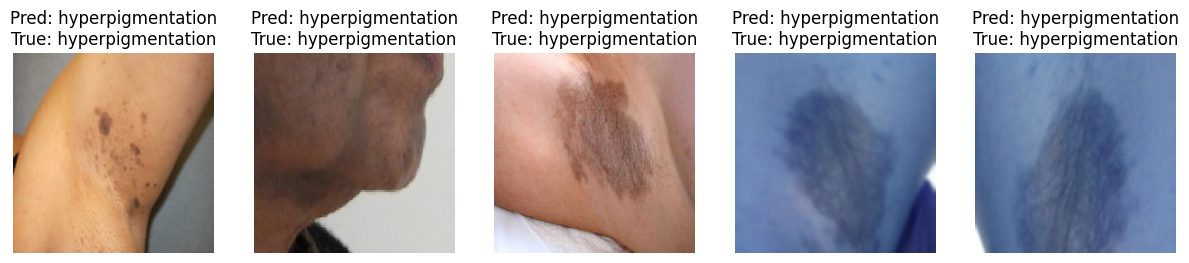

In [80]:
import random

# Ambil batch gambar dari test set
x_test, y_test = next(test_generator)
preds = model.predict(x_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Tampilkan 5 sampel gambar
plt.figure(figsize=(15, 5))
for i in range(5):
    idx = random.randint(0, len(x_test)-1)
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_labels[pred_labels[idx]]}\nTrue: {class_labels[true_labels[idx]]}")
    plt.axis("off")
plt.show()

In [81]:
model.save('/kaggle/working/modelPI.keras')